# Dataset of the 2016 matric year results

This dataset will be looking into the 2016 matric year results, to find out how this year compares to the previous year. Also we would like to see the performance of certain areas in the dataset and how they could possibly correlate with one another

## Setting the Dataset

In this section of our project, we will be setting up the dataset by importing the necessary libraries and also reading the file 2016-matric_year.csv file into a pandas dataframe.

We will also be cleaning up the defined dataset into a readable and more functional table to which we perform actions like exploring the dataset and also visualizing the data.

### Importing and Reading .csv file

In [268]:
#Declaring our imports
import numpy as np
import pandas as pd
import seaborn as sns
import ast, json
import missingno
from scipy import stats
from datetime import datetime
from wordcloud import WordCloud
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
% matplotlib inline


UsageError: Line magic function `%` not found.


In [269]:
# Declaring our dataset
df = pd.read_csv('2016_matric_school_report.csv')
df

,emis,centre_no,name,quintile,wrote_2014,passed_2014,perc_2014,progressed_2015,wrote_2015,passed_2015,perc_2015,progressed_2016,wrote_2016,passed_2016,perc_2016
0,0,4021043,MBUMBAZI SENIOR SECONDARY SCHOOL,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0,38,11,28.9
1,700888031,8888031,VINE CHRISTIAN COLLEGE,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,0.0
2,0,5512000,UGU CENTRE 1,99.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,32,29,90.6
3,600105347,9158037,NEW COVENANT ACADEMY,99.0,NaN,NaN,NaN,0.0,20.0,5.0,25.0,3,13,3,23.1
4,200300003,4161001,AMABELE SENIOR SECONDARY SCHOOL,1.0,37.0,14.0,37.8,0.0,38.0,29.0,76.3,12,51,36,70.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,440304212,3171004,BLOEMFONTEIN SS,5.0,140.0,134.0,95.7,1.0,142.0,137.0,96.5,1,143,140,97.9
996,440304255,3171008,BREBNER SS,5.0,297.0,283.0,95.3,1.0,294.0,261.0,88.8,3,299,265,88.6
997,440304207,3171055,C EN N H MEISIESKOOL ORANJE,5.0,117.0,117.0,100.0,0.0,155.0,155.0,100.0,0,144,144,100.0
998,440303127,3171009,CALCULUS BLOEMFONTEIN SI/S,99.0,86.0,77.0,89.5,57.0,66.0,60.0,90.9,0,46,42,91.3


In [270]:
# Columns that currently exist within dataset
df.columns


Index(['emis', 'centre_no', 'name', 'quintile', 'wrote_2014', 'passed_2014',
       'perc_2014', 'progressed_2015', 'wrote_2015', 'passed_2015',
       'perc_2015', 'progressed_2016', 'wrote_2016', 'passed_2016',
       'perc_2016'],
      dtype='object')

### Cleaning up the dataframe

In [271]:
# Discovering missing data
missing_values_count = df.isnull().sum()
missing_values_count[:15]

emis                0
centre_no           0
name                0
quintile            9
wrote_2014         53
passed_2014        53
perc_2014          11
progressed_2015    27
wrote_2015         27
passed_2015        27
perc_2015          27
progressed_2016     0
wrote_2016          0
passed_2016         0
perc_2016           0
dtype: int64

<AxesSubplot:>

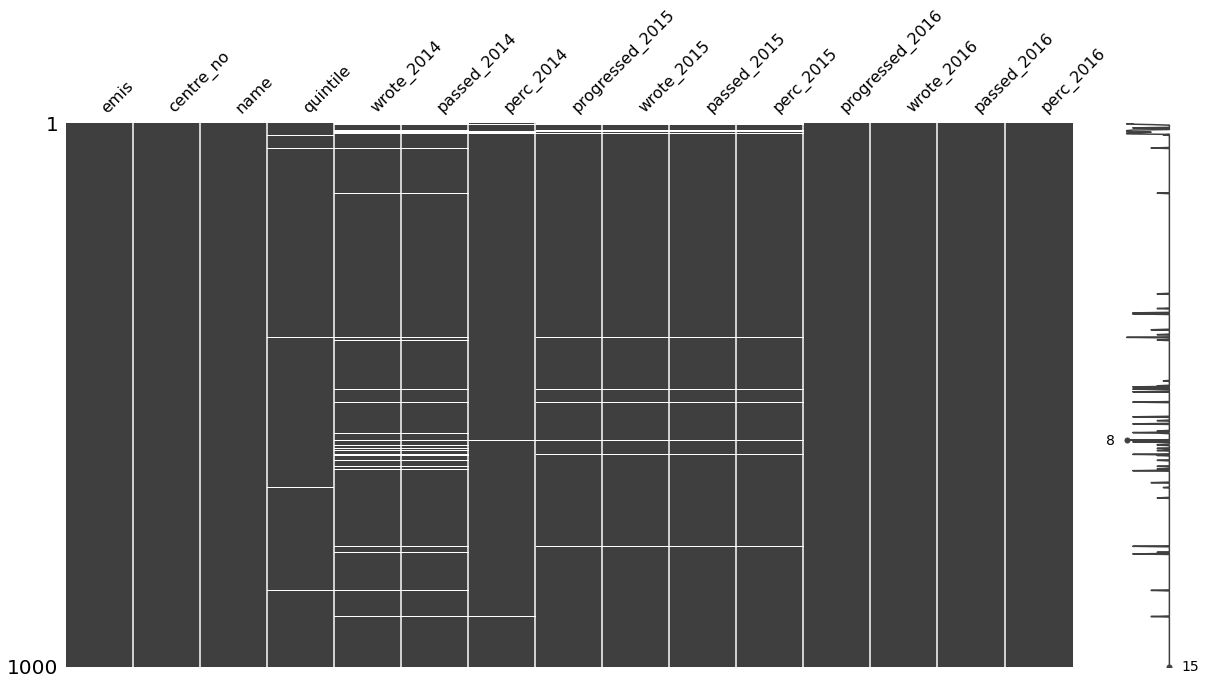

In [272]:
# # Chart to display how the data that is missing looks like
missingno.matrix(df, figsize=(20,10))

In [273]:
df.shape

(1000, 15)

In [274]:
# Dropping all rows that contain nan values
df = df.dropna()

df.shape

(943, 15)

<AxesSubplot:>

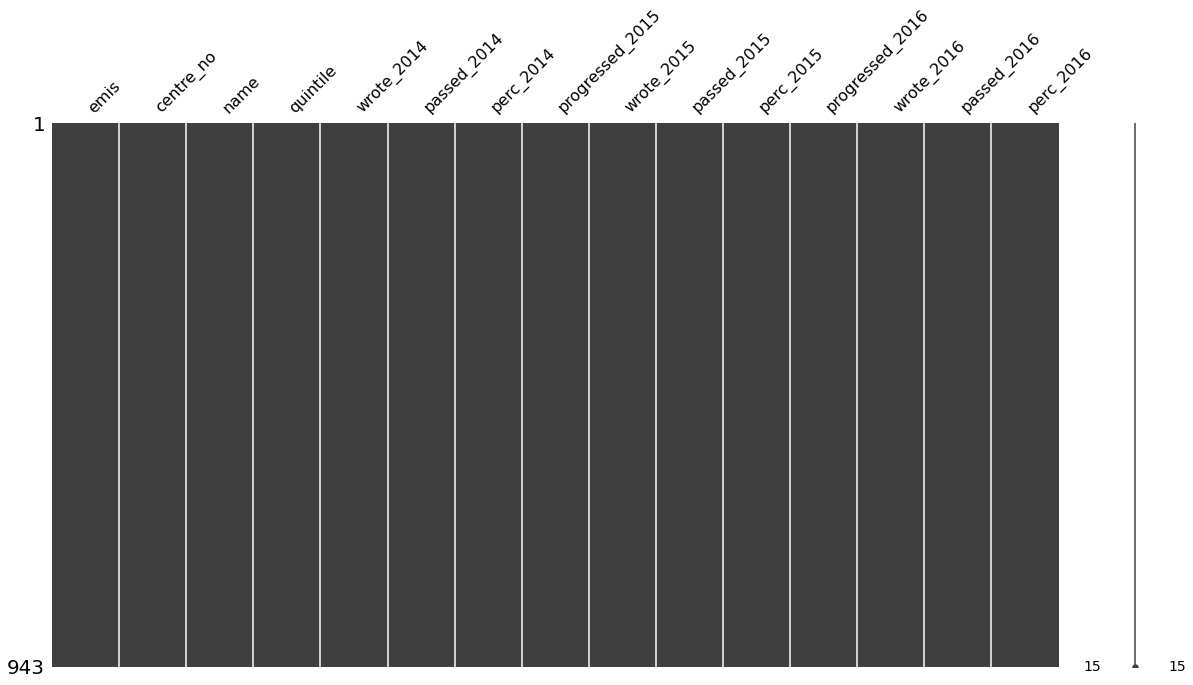

In [275]:
# Chart to display how the data looks like after imputation
missingno.matrix(df, figsize=(20,10))

In [276]:
# Dropping rows from a column values that contains qunitle value 99.0
df = df[df['quintile'] != 99.0]
df.shape

(892, 15)

## Exploring the data

In this section, I will be exploring the values that are contained within the dataset. Doing same basic comparisons, finding out the minimum and the maximum for selected column values and selecting the columns that will be later used for Data Visualization

#### How many schools belong to each quintile?

In [277]:

quintile_df = df.loc[:,['quintile']]
quintile_df.value_counts()

quintile
3.0         372
1.0         206
2.0         192
5.0          81
4.0          41
dtype: int64

#### Comparing School with Quintiles of a 100% pass rate for each year

In [278]:

quintile_pass_2014_df = df.loc[:,['quintile', 'perc_2014']]
quintile_pass_2014_df = quintile_pass_2014_df.loc[quintile_pass_2014_df['perc_2014'] == 100]
quintile_pass_2014_df.value_counts()

quintile  perc_2014
5.0       100.0        22
4.0       100.0         7
1.0       100.0         5
3.0       100.0         4
2.0       100.0         1
dtype: int64

In [279]:
quintile_pass_2015_df = df.loc[:,['quintile', 'perc_2015']]
quintile_pass_2015_df = quintile_pass_2015_df.loc[quintile_pass_2015_df['perc_2015'] == 100]
quintile_pass_2015_df.value_counts()

quintile  perc_2015
5.0       100.0        22
4.0       100.0         9
3.0       100.0         5
1.0       100.0         3
2.0       100.0         2
dtype: int64

In [280]:
quintile_pass_2016_df = df.loc[:,['quintile', 'perc_2016']]
quintile_pass_2016_df = quintile_pass_2016_df.loc[quintile_pass_2016_df['perc_2016'] == 100]
quintile_pass_2016_df.value_counts()

quintile  perc_2016
5.0       100.0        28
3.0       100.0        10
4.0       100.0         9
2.0       100.0         5
1.0       100.0         1
dtype: int64

#### Exploring the top 5 Schools who wrote the most for each year

In [341]:

name_wrote2014 = df.loc[:,['name', 'wrote_2014', 'passed_2014']]
name_wrote2014['failed_2014'] = name_wrote2014['wrote_2014'] -name_wrote2014['passed_2014']
name_wrote2014.sort_values(by=['wrote_2014'], ascending=False).head(10)

,name,wrote_2014,passed_2014,failed_2014
478,BIZANA SENIOR SECONDARY SCHOOL,416.0,260.0,156.0
627,ST JOHNS COLLEGE,367.0,343.0,24.0
41,MSOBOMVU SENIOR SECONDARY SCHOOL,358.0,170.0,188.0
134,NGANGOLWANDLE SENIOR SENIOR SECONDARY,331.0,230.0,101.0
638,ZAMAKULUNGISA SENIOR SECONDARY SCHOOL,317.0,220.0,97.0
518,LEHANA SENIOR SECONDARY SCHOOL,314.0,217.0,97.0
996,BREBNER SS,297.0,283.0,14.0
440,TOLI SENIOR SECONDARY SCHOOL,294.0,286.0,8.0
603,KHANYISA HIGH SCHOOL,287.0,272.0,15.0
843,MOLLY BLACKBURN SENIOR SECONDARY SCHOOL,253.0,183.0,70.0


In [398]:
name_wrote2015 = df.loc[:,['name', 'wrote_2015','passed_2015']]
name_wrote2015['failed_2015'] = name_wrote2015['wrote_2015'] -name_wrote2015['passed_2015']
name_wrote2015.sort_values(by=['wrote_2015'], ascending=False).head()

,name,wrote_2015,passed_2015,failed_2015
134,NGANGOLWANDLE SENIOR SENIOR SECONDARY,648.0,415.0,233.0
627,ST JOHNS COLLEGE,462.0,428.0,34.0
478,BIZANA SENIOR SECONDARY SCHOOL,448.0,279.0,169.0
440,TOLI SENIOR SECONDARY SCHOOL,425.0,391.0,34.0
525,SIDINANE SENIOR SECONDARY SCHOOL,395.0,240.0,155.0


In [399]:
name_wrote2016 = df.loc[:,['name', 'wrote_2016','passed_2016']]
name_wrote2016['failed_2016'] = name_wrote2016['wrote_2016'] -name_wrote2016['passed_2016']
name_wrote2016.sort_values(by=['wrote_2016'], ascending=False).head()

,name,wrote_2016,passed_2016,failed_2016
134,NGANGOLWANDLE SENIOR SENIOR SECONDARY,707,200,507
478,BIZANA SENIOR SECONDARY SCHOOL,420,279,141
518,LEHANA SENIOR SECONDARY SCHOOL,418,282,136
463,MQIKELA SENIOR SENIOR SECONDARY SCHOOL,402,119,283
627,ST JOHNS COLLEGE,394,378,16


#### Exploring the top 5 Schools who passed the most for each year

In [400]:

name_passed2014 = df.loc[:,['name', 'passed_2014']]
name_passed2014.sort_values(by=['passed_2014'], ascending=False).head()

,name,passed_2014
627,ST JOHNS COLLEGE,343.0
440,TOLI SENIOR SECONDARY SCHOOL,286.0
996,BREBNER SS,283.0
603,KHANYISA HIGH SCHOOL,272.0
478,BIZANA SENIOR SECONDARY SCHOOL,260.0


In [401]:
name_passed2015 = df.loc[:,['name', 'passed_2015']]
name_passed2015.sort_values(by=['passed_2015'], ascending=False).head()

,name,passed_2015
627,ST JOHNS COLLEGE,428.0
134,NGANGOLWANDLE SENIOR SENIOR SECONDARY,415.0
440,TOLI SENIOR SECONDARY SCHOOL,391.0
478,BIZANA SENIOR SECONDARY SCHOOL,279.0
603,KHANYISA HIGH SCHOOL,278.0


In [402]:
name_passed2016 = df.loc[:,['name', 'passed_2016']]
name_passed2016.sort_values(by=['passed_2016'], ascending=False).head()

,name,passed_2016
627,ST JOHNS COLLEGE,378
440,TOLI SENIOR SECONDARY SCHOOL,316
425,NDAMASE SENIOR SECONDARY SCHOOL,298
518,LEHANA SENIOR SECONDARY SCHOOL,282
478,BIZANA SENIOR SECONDARY SCHOOL,279


#### Exploring the top 5 schools with the highest percentage

In [403]:

name_perc2014 = df.loc[:,['name', 'perc_2014']]
name_perc2014.sort_values(by=['perc_2014'], ascending=False).head()

,name,perc_2014
997,C EN N H MEISIESKOOL ORANJE,100.0
437,SMUTS NDAMASE SENIOR SECONDARY SCHOOL,100.0
834,HOeRSKOOL MC LACHLAN,100.0
979,THEUNISSEN CS,100.0
990,ALBERT MOROKA SS,100.0


In [404]:
name_perc2015 = df.loc[:,['name', 'perc_2015']]
name_perc2015.sort_values(by=['perc_2015'], ascending=False).head()

,name,perc_2015
997,C EN N H MEISIESKOOL ORANJE,100.0
180,LILYFONTEIN SCHOOL,100.0
692,GREY BOYS SCHOOL,100.0
696,HOeRSKOOL D.F MALHERBE,100.0
927,BOTHAVILLE SS,100.0


In [405]:
name_perc2016 = df.loc[:,['name', 'perc_2016']]
name_perc2016.sort_values(by=['perc_2016'], ascending=False).head()

,name,perc_2016
997,C EN N H MEISIESKOOL ORANJE,100.0
97,MARLOW AGRICULTURAL HIGH SCHOOL,100.0
915,TWEELING CS,100.0
918,VILLIERS CS,100.0
920,WILGERIVIER CS,100.0


#### How many schools had a 100% pass rate from each year

In [406]:

quintile_df = df['perc_2014']
pass_rate_100_percent_2014 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2014

100.0    39
Name: perc_2014, dtype: int64

In [407]:
quintile_df = df['perc_2015']
pass_rate_100_percent_2015 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2015

100.0    41
Name: perc_2015, dtype: int64

In [408]:
quintile_df = df['perc_2016']
pass_rate_100_percent_2016 = quintile_df.value_counts().head(1)
pass_rate_100_percent_2016

100.0    53
Name: perc_2016, dtype: int64

# Visualization of the data

This section will visualize the data which I will explore.  

From here, we will just draw up visuals just to provide and even better represantion of the data.

We will use different type of charts to in order to present the different types of data.

#### Horizontal bar graph of how many schools belong to each quintile? 

Text(0.5, 1.0, 'How many schools  belong to each quintile?')

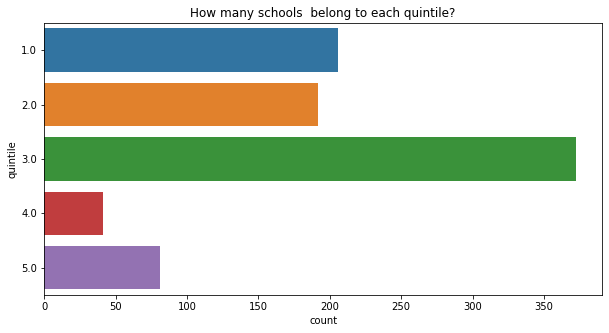

In [409]:

fig =plt.figure(figsize=(10,5))
sns.countplot(y='quintile', data=df)
plt.title("How many schools  belong to each quintile?")

#### Vertical bar graph of the performance of schools for each year.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'EZINGCUKA SENIOR SECONDARY SCHOOL'),
  Text(1, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(2, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(3, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(4, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(5, 0, 'EZIZWENI SENIOR SECONDARY SCHOOL'),
  Text(6, 0, 'EZINGQAYI SENIOR SECONDARY SCHOOL'),
  Text(7, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(8, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(9, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL')])

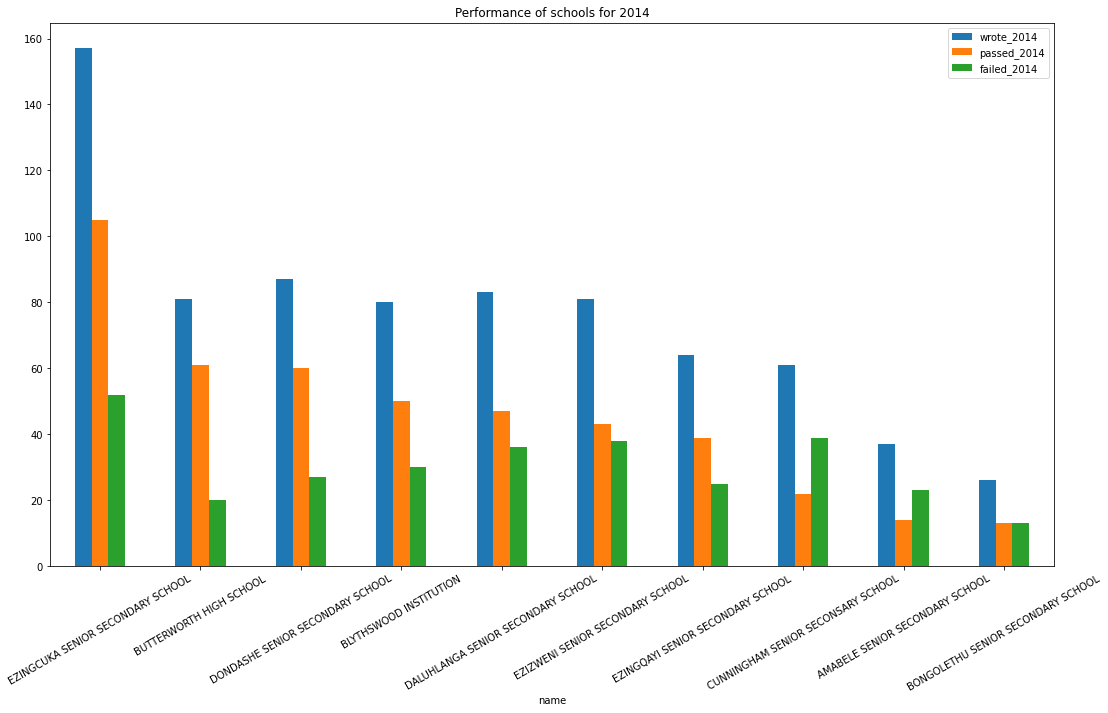

In [410]:

name_wrote2014.iloc[:10,].sort_values(by='passed_2014', ascending=False).plot(kind='bar',x='name',figsize=(18,10),title='Performance of schools for 2014')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'EZINGQAYI SENIOR SECONDARY SCHOOL'),
  Text(2, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(3, 0, 'EZIZWENI SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(5, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(6, 0, 'EZINGCUKA SENIOR SECONDARY SCHOOL'),
  Text(7, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(8, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(9, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL')])

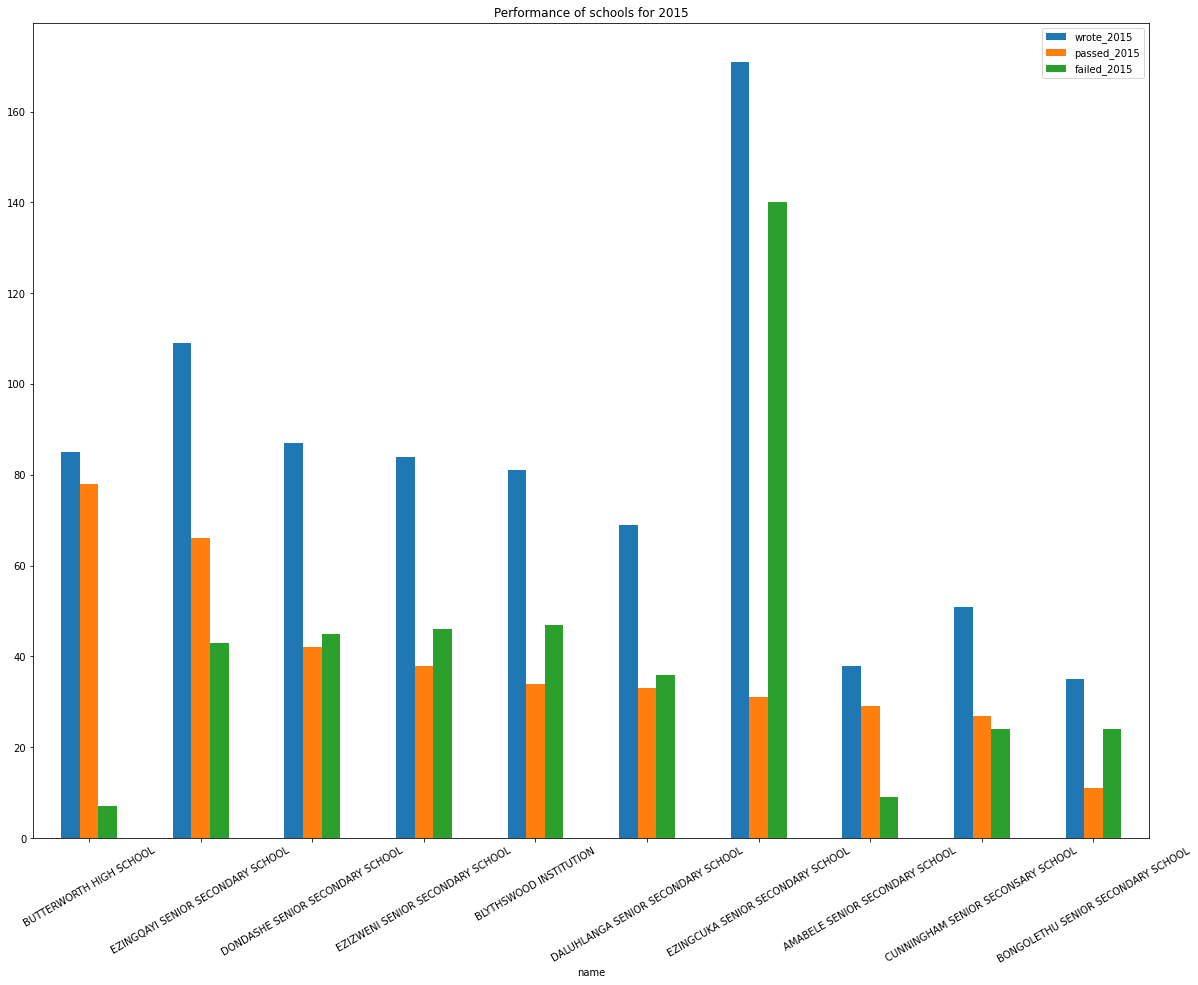

In [411]:
name_wrote2015.iloc[:10,].sort_values(by='passed_2015', ascending=False).plot(kind='bar',x='name',figsize=(20,15),title='Performance of schools for 2015')
plt.xticks(rotation=30)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'BUTTERWORTH HIGH SCHOOL'),
  Text(1, 0, 'EZINGQAYI SENIOR SECONDARY SCHOOL'),
  Text(2, 0, 'BLYTHSWOOD INSTITUTION'),
  Text(3, 0, 'EZIZWENI SENIOR SECONDARY SCHOOL'),
  Text(4, 0, 'EZINGCUKA SENIOR SECONDARY SCHOOL'),
  Text(5, 0, 'DALUHLANGA SENIOR SECONDARY SCHOOL'),
  Text(6, 0, 'DONDASHE SENIOR SECONDARY SCHOOL'),
  Text(7, 0, 'AMABELE SENIOR SECONDARY SCHOOL'),
  Text(8, 0, 'CUNNINGHAM SENIOR SECONSARY SCHOOL'),
  Text(9, 0, 'BONGOLETHU SENIOR SECONDARY SCHOOL')])

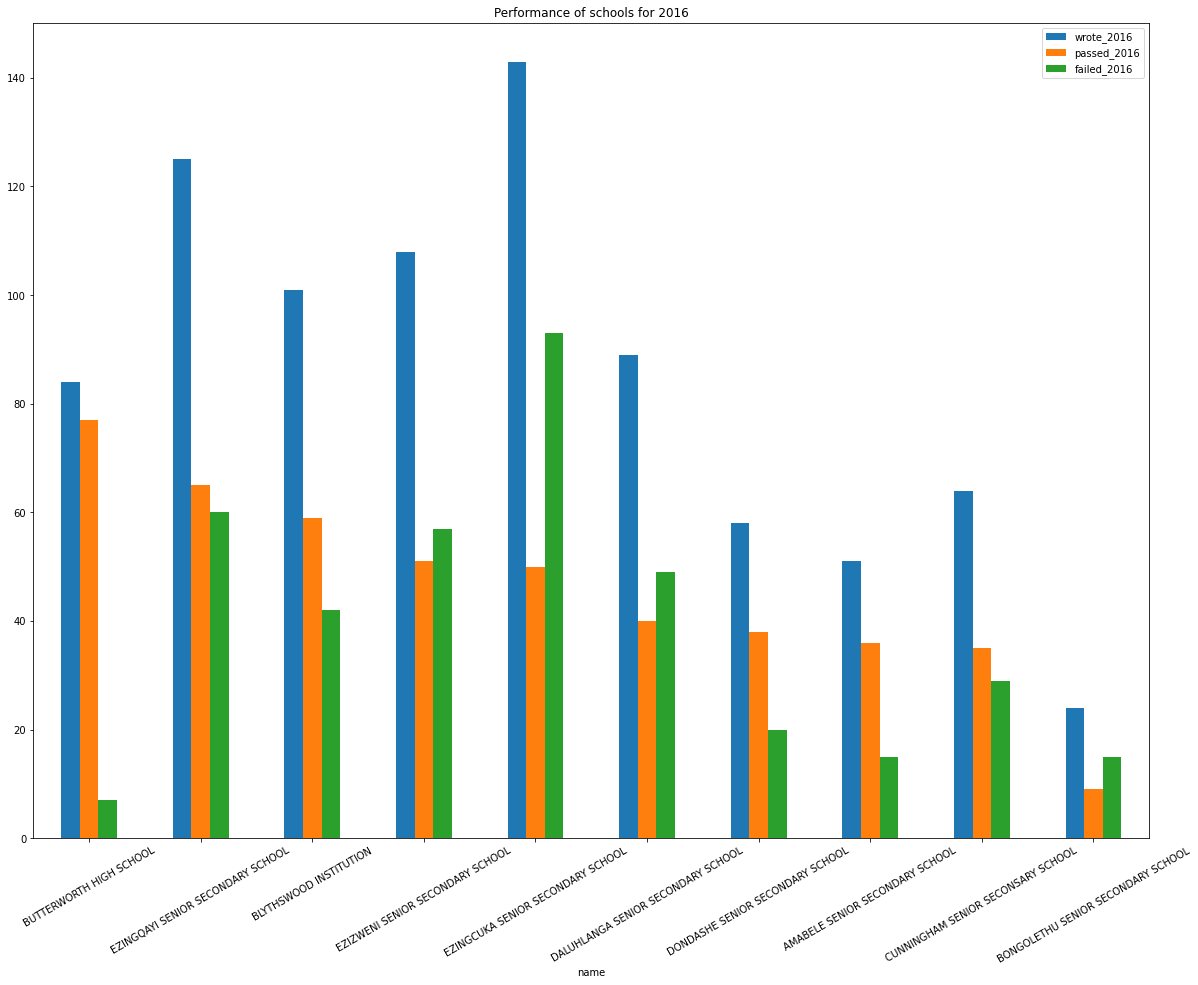

In [412]:
name_wrote2016.iloc[:10,].sort_values(by='passed_2016', ascending=False).plot(kind='bar',x='name',figsize=(20,15),title='Performance of schools for 2016')
plt.xticks(rotation=30)

#### Horizontal stacked bar graph of the top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years.

<AxesSubplot:title={'center':'Top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years'}, ylabel='name'>

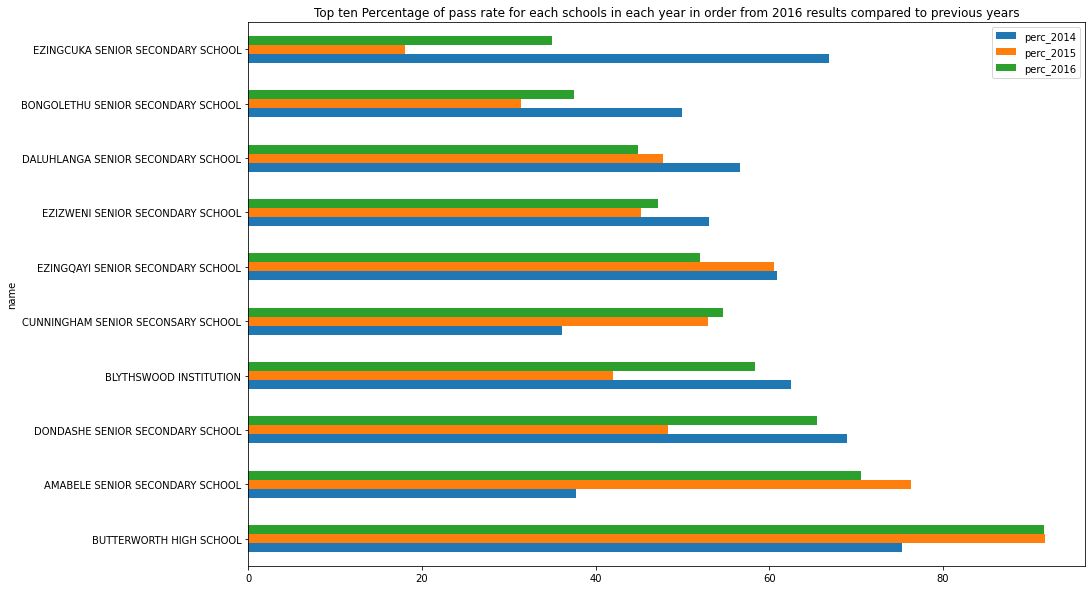

In [413]:

perc_rates_of_schools = df.loc[:,['name', 'perc_2014', 'perc_2015','perc_2016']]
perc_rates_of_schools.iloc[:10].sort_values(by='perc_2016', ascending=False).plot.barh(x='name',figsize=(15,10), title='Top ten Percentage of pass rate for each schools in each year in order from 2016 results compared to previous years')


#### Pie chart of the most performing quintile for each year.

##### 2014

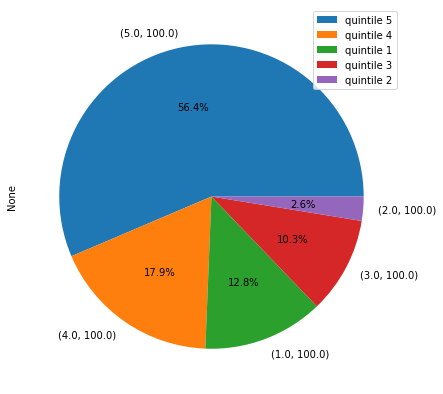

In [414]:

fig,ax = plt.subplots()
pass_rate_of_100_percent_2014 = quintile_pass_2014_df.value_counts()
x_axis = ['quintile 5','quintile 4','quintile 1','quintile 3','quintile 2']
pass_rate_of_100_percent_2014.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)


##### 2015

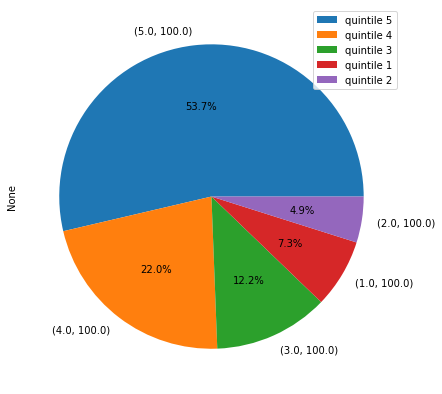

In [415]:
fig,ax = plt.subplots()
pass_rate_of_100_percent_2015 = quintile_pass_2015_df.value_counts()
x_axis = ['quintile 5','quintile 4','quintile 3','quintile 1','quintile 2']
pass_rate_of_100_percent_2015.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)

##### 2016

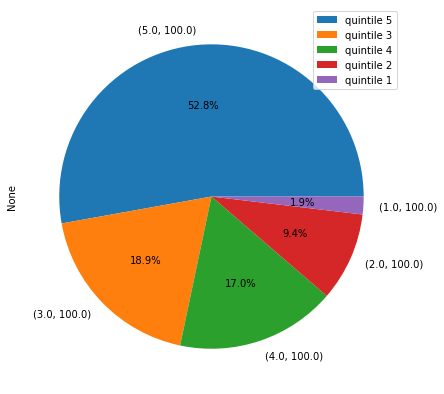

In [416]:
fig,ax = plt.subplots()
pass_rate_of_100_percent_2016 = quintile_pass_2016_df.value_counts()
x_axis = ['quintile 5','quintile 3','quintile 4','quintile 2','quintile 1']
pass_rate_of_100_percent_2016.plot(kind='pie',figsize=(12,7),autopct='%1.1f%%')
ax.legend(x_axis)